22H1120016 - Trần Đăng Nam

Dựa vào link sau - không dùng scikit-learn: https://benalexkeen.com/k-means-clustering-in-python/

K-means clustering is a clustering algorithm that aims to partition **"n observations"** into **"k" clusters**.

There are 3 steps:

1. **Initialisation** – K initial “means” (centroids) are generated at random

2. **Assignment** – K clusters are created by associating each observation with the nearest centroid

3. **Update** – The centroid of the clusters becomes the new mean

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy # Để copy centroids, tránh tham chiếu trực tiếp


Dữ liệu X được tạo với shape: (150, 2)


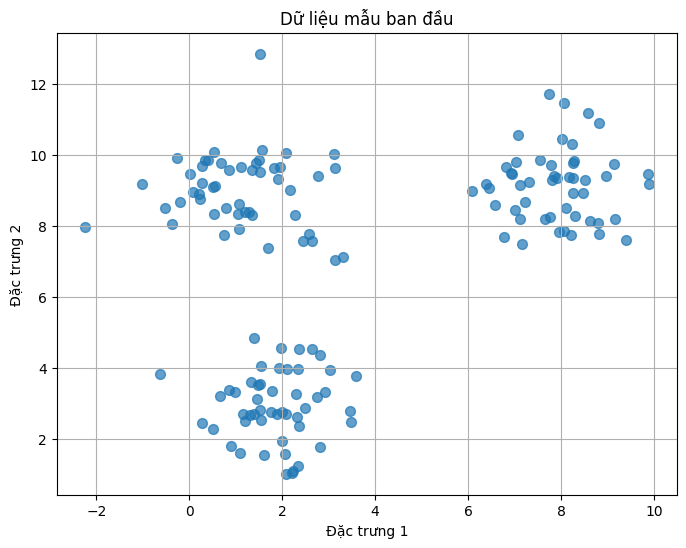

In [6]:
# Trong link tham khảo dùng - Scikit Learn

# 1. Tạo 3 cụm dữ liệu giả lập
np.random.seed(42) # Để kết quả có thể tái lập
n_samples_per_cluster = 50
center_1 = [2, 3]
center_2 = [8, 9]
center_3 = [1, 9]

# Tạo các điểm xung quanh các tâm cụm với một chút nhiễu (phân phối chuẩn)
cluster_1 = np.random.randn(n_samples_per_cluster, 2) + center_1
cluster_2 = np.random.randn(n_samples_per_cluster, 2) + center_2
cluster_3 = np.random.randn(n_samples_per_cluster, 2) + center_3

# 2. Gộp tất cả dữ liệu lại thành một mảng duy nhất
X = np.vstack((cluster_1, cluster_2, cluster_3))

print(f"Dữ liệu X được tạo với shape: {X.shape}") # (150, 2)

# Visualize lần đầu 
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Dữ liệu mẫu ban đầu')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.grid(True)
plt.show()

In [7]:
# 3. Hàm tính khoảng cách Euclidean

def euclidean_distance(point1, point2):
    """Tính khoảng cách Euclidean giữa hai điểm (numpy arrays)."""
    return np.sqrt(np.sum((point1 - point2)**2))

# Test hàm khoảng cách (tùy chọn)
p1 = np.array([1, 1])
p2 = np.array([4, 5])
dist = euclidean_distance(p1, p2)
print(f"Khoảng cách giữa {p1} và {p2} là: {dist:.2f}") 

Khoảng cách giữa [1 1] và [4 5] là: 5.00


  """
    Thực hiện thuật toán K-Means.

    Args:
        X (np.ndarray): Mảng dữ liệu đầu vào, shape (n_samples, n_features).
        k (int): Số lượng cụm mong muốn.
        max_iterations (int): Số vòng lặp tối đa.
        tolerance (float): Ngưỡng thay đổi tâm cụm để coi là hội tụ.

    Returns:
        tuple: Chứa:
            - centroids (np.ndarray): Tọa độ các tâm cụm cuối cùng, shape (k, n_features).
            - clusters (dict): Dictionary với key là index cụm (0 đến k-1),
                               value là list các index của điểm dữ liệu thuộc cụm đó.
            - history (list): Lịch sử thay đổi của tâm cụm qua các vòng lặp (để trực quan hóa).
    """

In [10]:
# 4. Hàm K-Means (do không được dùng của scikit-learn)
def kmeans(X, k, max_iterations=100, tolerance=1e-4):
  
    n_samples, n_features = X.shape

    # --- Bước 1: Khởi tạo tâm cụm (Centroids) ---
    # Chọn ngẫu nhiên k điểm từ dữ liệu làm tâm cụm ban đầu
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]
    print("Tâm cụm khởi tạo:")
    print(centroids)

    history = {'centroids': [copy.deepcopy(centroids)], 'clusters': []} # Lưu lịch sử để trực quan

    for iteration in range(max_iterations):
        print(f"\n--- Vòng lặp {iteration + 1} ---")

        # --- Bước 2: Gán nhãn (Assignment Step) ---
        # Tạo cấu trúc để lưu các điểm thuộc về mỗi cụm
        clusters = {i: [] for i in range(k)} # Dictionary: key=cluster_idx, value=list of point indices

        for point_idx, point in enumerate(X):
            # Tính khoảng cách từ điểm hiện tại đến tất cả các tâm cụm
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            # Tìm index của tâm cụm gần nhất
            closest_centroid_idx = np.argmin(distances)
            # Gán điểm này vào cụm tương ứng
            clusters[closest_centroid_idx].append(point_idx)

        history['clusters'].append(copy.deepcopy(clusters)) # Lưu trạng thái gán nhãn

        # Lưu lại tâm cụm cũ để kiểm tra hội tụ
        old_centroids = copy.deepcopy(centroids)

        # --- Bước 3: Cập nhật tâm cụm (Update Step) ---
        print("Cập nhật tâm cụm:")
        for cluster_idx in range(k):
            # Lấy tất cả các điểm thuộc về cụm hiện tại
            points_in_cluster_indices = clusters[cluster_idx]

            if len(points_in_cluster_indices) > 0:
                # Lấy tọa độ thực tế của các điểm
                points = X[points_in_cluster_indices]
                # Tính trung bình cộng tọa độ để ra tâm cụm mới
                new_centroid = np.mean(points, axis=0)
                centroids[cluster_idx] = new_centroid
                print(f"  Cụm {cluster_idx}: Tâm mới = {new_centroid}")
            else:
                # Xử lý trường hợp cụm rỗng (hiếm khi xảy ra với khởi tạo ngẫu nhiên từ điểm dữ liệu)
                # Có thể giữ nguyên tâm cũ hoặc chọn lại ngẫu nhiên. Giữ nguyên cho đơn giản.
                print(f"  Cụm {cluster_idx}: Rỗng, giữ nguyên tâm cũ.")
                pass # Centroid giữ nguyên giá trị từ vòng lặp trước

        history['centroids'].append(copy.deepcopy(centroids)) # Lưu tâm cụm mới

        # --- Bước 4: Kiểm tra hội tụ ---
        # Tính tổng sự thay đổi vị trí của các tâm cụm
        centroid_shifts = [euclidean_distance(old_centroids[i], centroids[i]) for i in range(k)]
        total_shift = np.sum(centroid_shifts)
        print(f"Tổng thay đổi vị trí tâm cụm: {total_shift:.6f}")

        if total_shift < tolerance:
            print(f"\nThuật toán hội tụ sau {iteration + 1} vòng lặp.")
            break

    if iteration == max_iterations - 1:
        print(f"\nThuật toán đạt số vòng lặp tối đa ({max_iterations}) mà chưa hội tụ hoàn toàn.")

    return centroids, clusters, history

In [11]:
# 5. Test  K-Mean
k = 3
max_iterations = 10
final_centroids, final_clusters, history = kmeans(X, k, max_iterations)

print("\n--- Kết quả cuối cùng ---")
print("Tâm cụm cuối cùng:")
print(final_centroids)
# print("\nPhân cụm cuối cùng (chỉ số điểm):")
# for i, indices in final_clusters.items():
#     print(f" Cụm {i}: {len(indices)} điểm") # Chỉ in số lượng điểm cho gọn

Tâm cụm khởi tạo:
[[1.92798988 4.0035329 ]
 [1.53936123 4.05712223]
 [6.58462926 8.57935468]]

--- Vòng lặp 1 ---
Cập nhật tâm cụm:
  Cụm 0: Tâm mới = [2.42682301 3.48850134]
  Cụm 1: Tâm mới = [0.68025734 6.58706655]
  Cụm 2: Tâm mới = [6.52604114 9.30911094]
Tổng thay đổi vị trí tâm cụm: 4.120937

--- Vòng lặp 2 ---
Cập nhật tâm cụm:
  Cụm 0: Tâm mới = [1.91501966 2.90973933]
  Cụm 1: Tâm mới = [1.00096759 8.77802238]
  Cụm 2: Tâm mới = [7.60393404 9.23626827]
Tổng thay đổi vị trí tâm cụm: 4.067254

--- Vòng lặp 3 ---
Cập nhật tâm cụm:
  Cụm 0: Tâm mới = [1.86432437 2.9279826 ]
  Cụm 1: Tâm mới = [1.12894675 9.00084575]
  Cụm 2: Tâm mới = [7.90454712 9.14006205]
Tổng thay đổi vị trí tâm cụm: 0.626471

--- Vòng lặp 4 ---
Cập nhật tâm cụm:
  Cụm 0: Tâm mới = [1.86432437 2.9279826 ]
  Cụm 1: Tâm mới = [1.12894675 9.00084575]
  Cụm 2: Tâm mới = [7.90454712 9.14006205]
Tổng thay đổi vị trí tâm cụm: 0.000000

Thuật toán hội tụ sau 4 vòng lặp.

--- Kết quả cuối cùng ---
Tâm cụm cuối cùng:
[

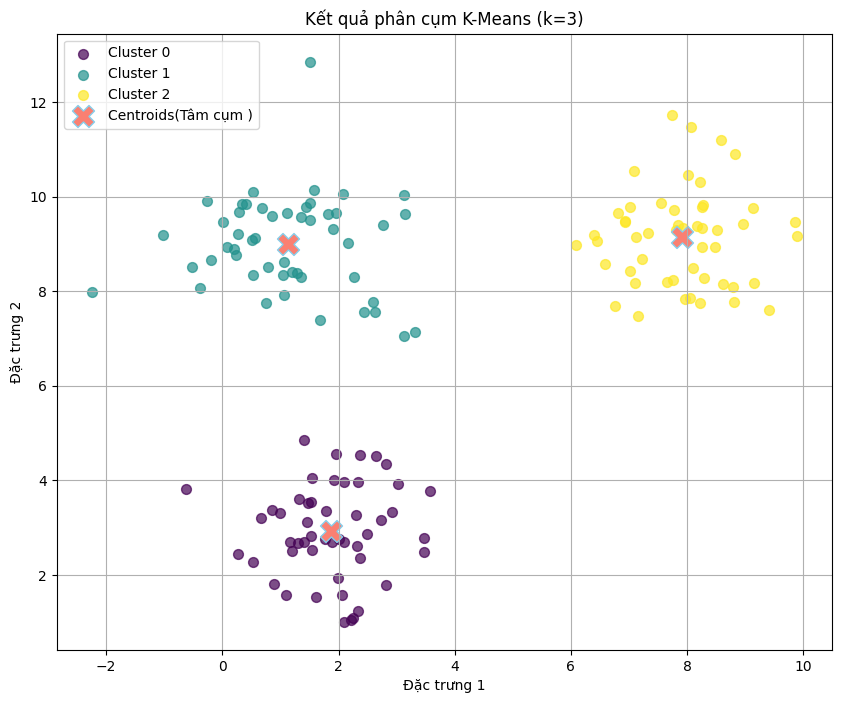

In [16]:
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, k)) # Tạo màu sắc khác nhau cho các cụm

# Vẽ các điểm dữ liệu theo cụm
for cluster_idx, point_indices in final_clusters.items():
    points_in_cluster = X[point_indices]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1],
                s=50, color=colors[cluster_idx], label=f'Cluster {cluster_idx}', alpha=0.7)

# Vẽ các tâm cụm cuối cùng
plt.scatter(final_centroids[:, 0], final_centroids[:, 1],
            s=250, marker='X', color='salmon', edgecolor='skyblue',
            label='Centroids(Tâm cụm )')

plt.title('Kết quả phân cụm K-Means (k=3)')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.legend()
plt.grid(True)
plt.show()

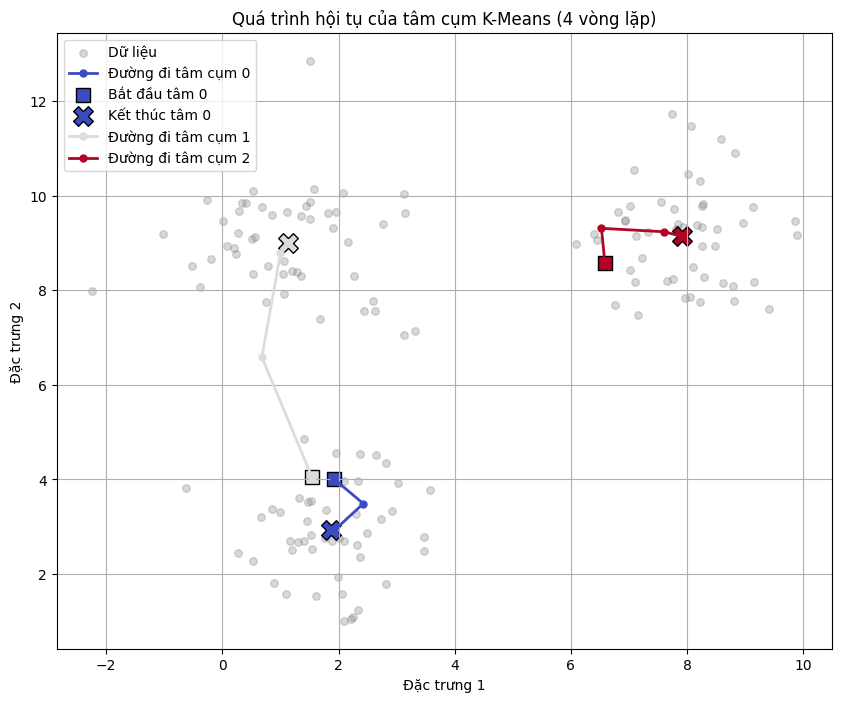

In [17]:
# 7. Visualize the clustering results

# Lấy lịch sử tâm cụm
centroids_history = history['centroids']
n_iterations_run = len(centroids_history) -1 # Số vòng lặp thực tế đã chạy

plt.figure(figsize=(10, 8))

# Vẽ dữ liệu gốc một lần
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.3, color='gray', label='Dữ liệu')

# Vẽ đường đi của các tâm cụm
colors = plt.cm.coolwarm(np.linspace(0, 1, k))
for i in range(k):
    # Lấy tọa độ của tâm cụm i qua các vòng lặp
    path = np.array([centroids_history[iter_idx][i] for iter_idx in range(n_iterations_run + 1)])
    plt.plot(path[:, 0], path[:, 1], marker='o', markersize=5, linestyle='-', color=colors[i], linewidth=2, label=f'Đường đi tâm cụm {i}')
    # Đánh dấu điểm bắt đầu và kết thúc
    plt.scatter(path[0, 0], path[0, 1], marker='s', s=100, color=colors[i], edgecolor='black', label=f'Bắt đầu tâm {i}' if i==0 else None) # Chỉ hiện label 1 lần
    plt.scatter(path[-1, 0], path[-1, 1], marker='X', s=200, color=colors[i], edgecolor='black', label=f'Kết thúc tâm {i}' if i==0 else None)

plt.title(f'Quá trình hội tụ của tâm cụm K-Means ({n_iterations_run} vòng lặp)')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
# Gom legend lại cho gọn
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles)) # Loại bỏ label trùng lặp
plt.legend(by_label.values(), by_label.keys(), loc='best')
plt.grid(True)
plt.show()